# Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

###  Descriptive Analytics for Numerical Columns
###   ●	Objective:
          To compute and analyze basic statistical measures for numerical columns in the dataset.
###   ●	Steps:
	      Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).
	      Identify numerical columns in the dataset.
	      Calculate the mean, median, mode, and standard deviation for these columns.
	      Provide a brief interpretation of these statistics.


In [2]:
#Import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#renamed dataset and load dataset 
df = pd.read_csv("Basis stats 1.csv") 
print(df.info()) # get information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB
None


In [4]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,1/4/2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.50120
1,1/4/2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102960,89323.89704
2,1/4/2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910160,102042.08980
3,1/4/2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.92530
4,1/4/2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.05377


## 1. Identify numerical columns in the dataset.

In [5]:
#Get the numerical columns from the dataset 
num_cols= df.select_dtypes(include='number').columns
numerical = df[num_cols]
#seperating numerical and categorical column for future purpose
categorical = df.drop(columns=num_cols)

## 2.Calculate mean median mode and std_dev for these numerical columns

In [6]:
num_mean=df[num_cols].mean() #get mean from numerical column
num_median=df[num_cols].median() #get median from numerical column
num_mode=df[num_cols].mode() #mode
num_std=df[num_cols].std() #standard_deviation
print("Mean: \n",num_mean) 
print("Median: \n",num_median)
print("Mode: \n", num_mode)
print("Standard deviation: \n", num_std)

Mean: 
 Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64
Median: 
 Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64
Mode: 
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0       3.0      400.0            24300.0           5.007822        69.177942   
1       NaN      450.0                NaN           5.055218        73.025199   
2       NaN      500.0                NaN           5.059801        93.649161   
3       NaN     1300.0                NaN           5.072124        94.682735   
4       NaN     8100.0                NaN           5.084108       102.705757   
..      ...        ...                ...                

# Data Visualization
 ###        ●	Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.
 ###        ●	Histograms:
	              Plot histograms for each numerical column.
	              Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.
 ###        ●	Boxplots:
	              Create boxplots for numerical variables to identify outliers and the interquartile range.
	              Discuss any findings, such as extreme values or unusual distributions.
 ###        ●	Bar Chart Analysis for Categorical Column:
	              Identify categorical columns in the dataset.
	              Create bar charts to visualize the frequency or count of each category.
	              Analyze the distribution of categories and provide insights.


## 1.Plot histograms for each numerical column.
	              Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.

Text(0.5, 0.98, 'Histograms of Numerical Columns')

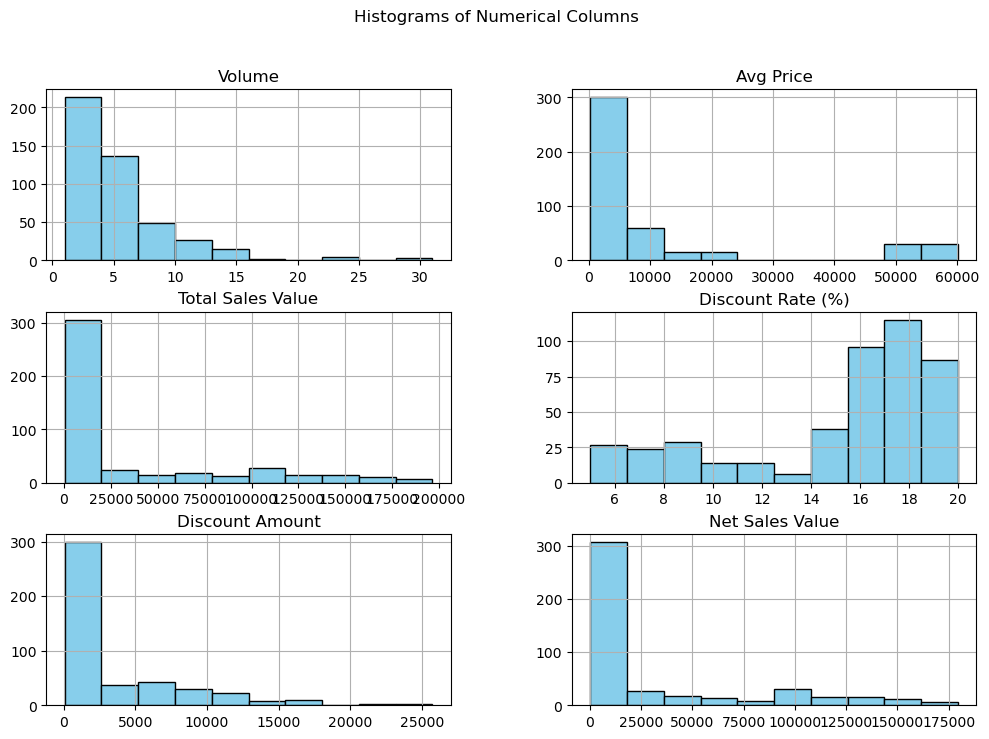

In [7]:
df.hist(figsize=(12,8), color='skyblue', edgecolor='black') #hist is package in pandas used for Histogram df.hist(df gives all numerical columns to histogram plat)
plt.suptitle("Histograms of Numerical Columns", fontsize=12)

In [8]:
skewness = 3*(num_mean-num_median)/num_std # Skewness calculation
skewness

Volume               0.756215
Avg Price            1.493940
Total Sales Value    1.668910
Discount Rate (%)   -1.011129
Discount Amount      1.568259
Net Sales Value      1.668850
dtype: float64

## Conclusion for Histogram plot: By analyzing the histogram and skewness,


            Volume: shows right skewed
            Avg price: right skewed slightly
            Total sales: right skewed 
            Discount rate: fairly symmetric but extreme outliers 
            Discount amount: clearly right skewed 
            Net sales: has few big transaction right skewed

## 2. Box plot for detect outliers

<Axes: >

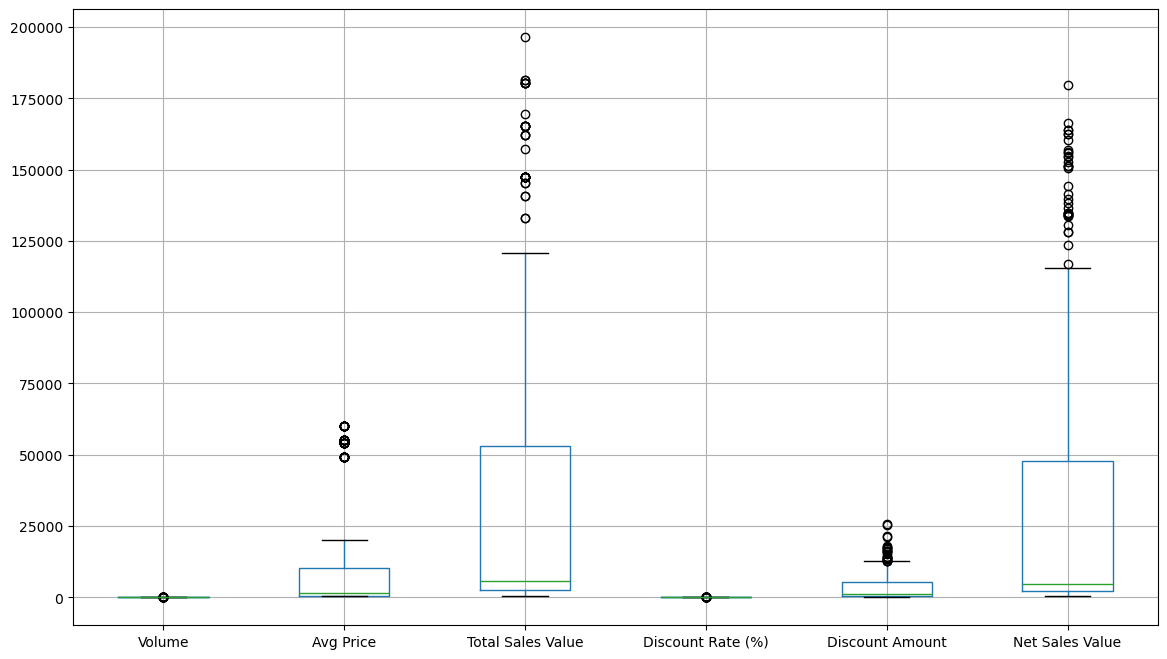

In [9]:
df.boxplot(figsize=(14,8))

In [10]:
def outlier_capping(df, col): #using function we reducing outliers to extreme values
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    print(f"\nColumn: {col}") #print column name
    print(f"  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}") #print Q1, Q2, Q3, IQR values
    print(f"  Lower Bound = {lower:.2f}, Upper Bound = {upper:.2f}") #print lower and upper bound values
    df[col] = df[col].clip(lower, upper)   # directly cap values using clip()

for col in df.select_dtypes(include=['int', 'float']).columns:
    outlier_capping(df, col)


Column: Volume
  Q1 = 3.00, Q3 = 6.00, IQR = 3.00
  Lower Bound = -1.50, Upper Bound = 10.50

Column: Avg Price
  Q1 = 465.00, Q3 = 10100.00, IQR = 9635.00
  Lower Bound = -13987.50, Upper Bound = 24552.50

Column: Total Sales Value
  Q1 = 2700.00, Q3 = 53200.00, IQR = 50500.00
  Lower Bound = -73050.00, Upper Bound = 128950.00

Column: Discount Rate (%)
  Q1 = 13.97, Q3 = 18.11, IQR = 4.15
  Lower Bound = 7.74, Upper Bound = 24.34

Column: Discount Amount
  Q1 = 460.46, Q3 = 5316.50, IQR = 4856.04
  Lower Bound = -6823.59, Upper Bound = 12600.55

Column: Net Sales Value
  Q1 = 2202.21, Q3 = 47847.91, IQR = 45645.70
  Lower Bound = -66266.35, Upper Bound = 116316.47


## Conclusion for Boxplot and Capping:

                           Volume: Right-skewed, many small sales but some extreme large sales(outliers)

                           Avg Price: Has some outliers

                           Total Sales Value & Net Sales Value:  Very high outliers (large transactions).

                           Discount Rate (%): not extreme

                           Discount Amount: has Outliers since higher prices yield huge discounts.

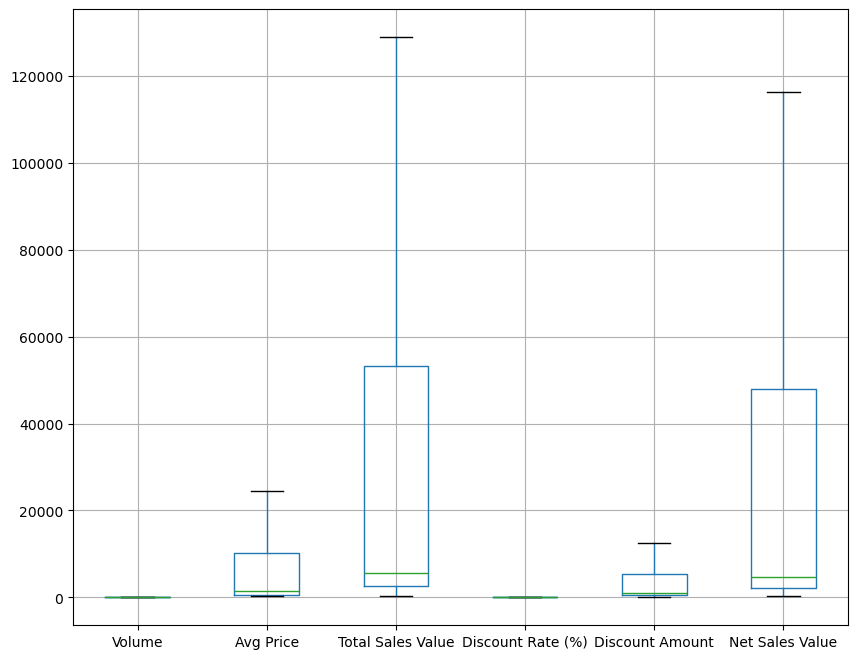

In [11]:
df[num_cols].boxplot(figsize=(10,8))
plt.show() #boxplot after clipping outliers

In [12]:
df.shape

(450, 13)

In [13]:
df.info() #information after clipping

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    float64
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    float64
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 45.8+ KB


In [14]:
categorical.head()

,Date,Day,SKU,City,BU,Brand,Model
0,1/4/2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,1/4/2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,1/4/2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,1/4/2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,1/4/2021,Thursday,M05,C,Mobiles,YouM,YM-98


## Identify categorical columns in the dataset.
	              Create bar charts to visualize the frequency or count of each category.
	              Analyze the distribution of categories and provide insights.

## 1. Create bar charts to visualize the frequency or count of each category.

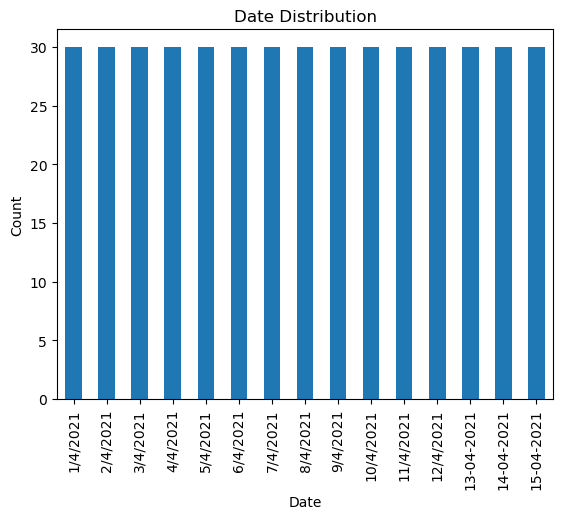

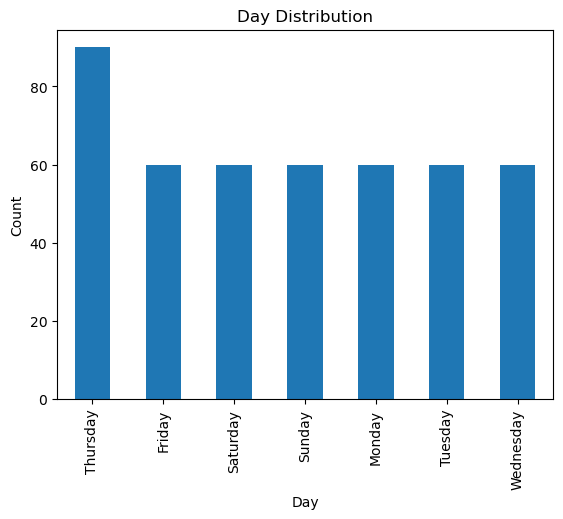

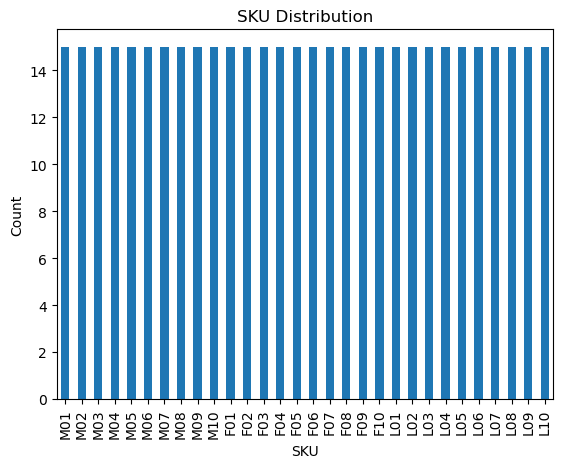

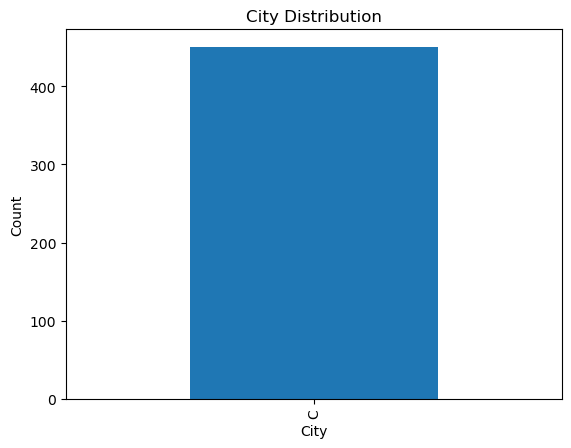

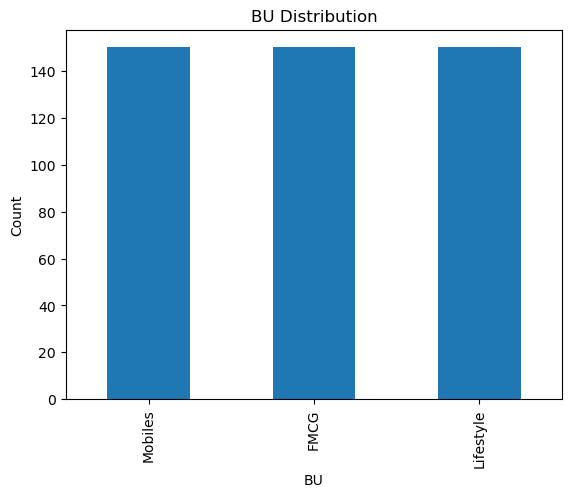

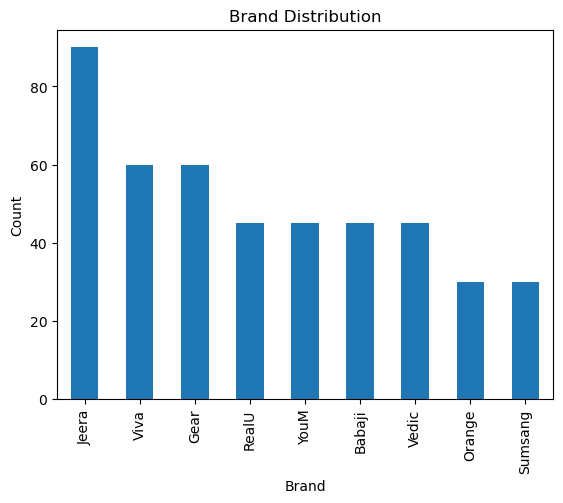

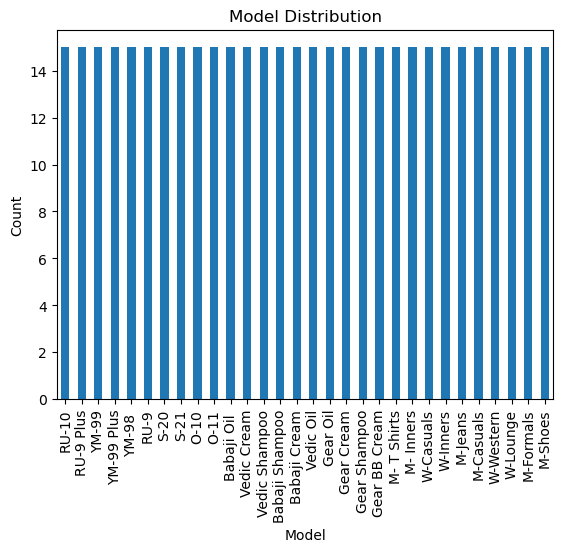

In [15]:
# categorical = ['Day', 'SKU', 'City', 'BU', 'Brand', 'Model']
for col in categorical: #using loop to get all categorical columns
    df[col].value_counts().plot(kind='bar') # Using bar chart we are getting distribution of categorical columns
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

## Insights from bar chart:
                    Day: Shows sales transactions by day of the week (or date).
                         Which days have higher sales activity.
                         Possible weekly demand patterns (e.g., weekends vs weekdays).
                         
                    SKU (Stock Keeping Unit): Unique product identifier.
                         Which specific products are sold most frequently.
                         Identify best-selling vs low-demand products.

                    City: Represents the geographic location of the sales.
                          Which cities contribute the highest sales volume.
                          Helps in identifying regional demand patterns.
                          
                    BU (Business Unit): Represents different business divisions.
                          Which business unit is performing strongly.
                          Detect imbalance in contributions across units.
                          
                    Brand: Product brand name.
                           Which brands are more popular among customers.
                           Market share of each brand in this dataset.
                    Model: Product model (subcategory of Brand/SKU).
                    
                           Which product model is in highest demand.
                           Detect fast-moving vs slow-moving models.

# Standardization of Numerical Variables
●   	Objective: To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.


●	Steps:

  
  Explain the concept of standardization (z-score normalization).
	Standardize the numerical columns using the formula: z=x-mu/sigma

	Show before and after comparisons of the data distributions.


In [16]:
standard=(numerical-num_mean)/num_std #Standarization using formula 
print("Before standardization:\n\n", numerical.head()) #values before standardization
print("\t")
print("After Standardization:\n\n",standard.head())# After standardization (-3 to 3)

Before standardization:

    Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102960   
2       7      16100             112700           9.456886     10657.910160   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0     160346.50120  
1      89323.89704  
2     102042.08980  
3     112235.92530  
4      19927.05377  
	
After Standardization:

      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552

# Conversion of Categorical Data into Dummy Variables
●	Objective: To transform categorical variables into a format that can be provided to ML algorithms.


●	Steps:

  
  Discuss the need for converting categorical data into dummy variables (one-hot encoding).
	Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.
	Display a portion of the transformed dataset.


In [17]:
categorical.head() #before conversion into dummy variables

,Date,Day,SKU,City,BU,Brand,Model
0,1/4/2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,1/4/2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,1/4/2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,1/4/2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,1/4/2021,Thursday,M05,C,Mobiles,YouM,YM-98


In [18]:
df.duplicated().sum() #check for duplicates

np.int64(0)

In [19]:
x=pd.get_dummies(categorical,dtype='int')#using get_dummies we changing categorical values to numerical (0,1)
x.head() #Changed int dummy variables

,Date_1/4/2021,Date_10/4/2021,Date_11/4/2021,Date_12/4/2021,Date_13-04-2021,Date_14-04-2021,Date_15-04-2021,Date_2/4/2021,Date_3/4/2021,Date_4/4/2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## CONCLUSION: The dataset has been cleaned, standardized, and explored.
            -Seperated numerical and categorical column.

            -Mean, Median, Mode, standard deviation has been identified.

            -Plotted histogram for data analyzing numerical column distribution in dataset.

            -Outliers were treated to reduce skewness with the help of boxplot.

            -Categorical distributions gave business-level insights(demand patterns by day, city, brand, and product)using barchart
             representation.

            -Numerical features were standardized, making the dataset ready for machine learning or advanced statistical analysis.

            -Lastly,transformed categorical variables into a format that can be provided to ML algorithms